In [134]:
import numpy as np

def generate_waveforms(num_sequences, sequence_length, num_modes, freq_range, amp_range, phase_range):
    """
    Generates a dataset of continuous waveforms, each composed of a sum of sinusoidal modes.
    Parameters:
    - num_sequences (int): Number of waveform sequences to generate.
    - sequence_length (int): Number of samples in each waveform sequence.
    - num_modes (int): Number of sinusoidal modes per sequence.
    - freq_range (tuple): Range of frequencies (min_freq, max_freq).
    - amp_range (tuple): Range of amplitudes (min_amp, max_amp).
    - phase_range (tuple): Range of phases (min_phase, max_phase).
    Returns:
    - np.array: Array of shape (num_sequences, sequence_length) containing the generated continuous waveforms.
    """
    waveforms = np.zeros((num_sequences, sequence_length))
    t = np.linspace(0, 2 * np.pi, sequence_length, endpoint=False)
    for i in range(num_sequences):
        for _ in range(num_modes):
            frequency = np.random.uniform(*freq_range)
            amplitude = np.random.uniform(*amp_range)
            phase = np.random.uniform(*phase_range)
            waveforms[i] += amplitude * np.sin(frequency * t + phase)
    return waveforms  # Shape: (num_sequences, sequence_length)

def discretize_waveforms(waveforms, num_bins):
    """
    Discretizes continuous waveforms into one-hot encoded bins after scaling.
    Parameters:
    - waveforms (np.array): Array of continuous waveforms (num_sequences, sequence_length).
    - num_bins (int): Number of bins for discretizing continuous values.
    Returns:
    - np.array: Array of shape (num_sequences, sequence_length, num_bins) containing one-hot encoded waveforms.
    """
    # Normalize the waveform values to [0, num_bins - 1]
    min_val, max_val = waveforms.min(), waveforms.max()
    scaled_waveforms = (waveforms - min_val) / (max_val - min_val) * (num_bins - 1)

    # Discretize to integer bins, ensuring values stay within [0, num_bins - 1]
    discretized_waveforms = np.clip(np.round(scaled_waveforms), 0, num_bins - 1).astype(int)
    
    # Convert to one-hot encoding
    one_hot_waveforms = np.eye(num_bins)[discretized_waveforms]
    
    return one_hot_waveforms  # Shape: (num_sequences, sequence_length, num_bins)


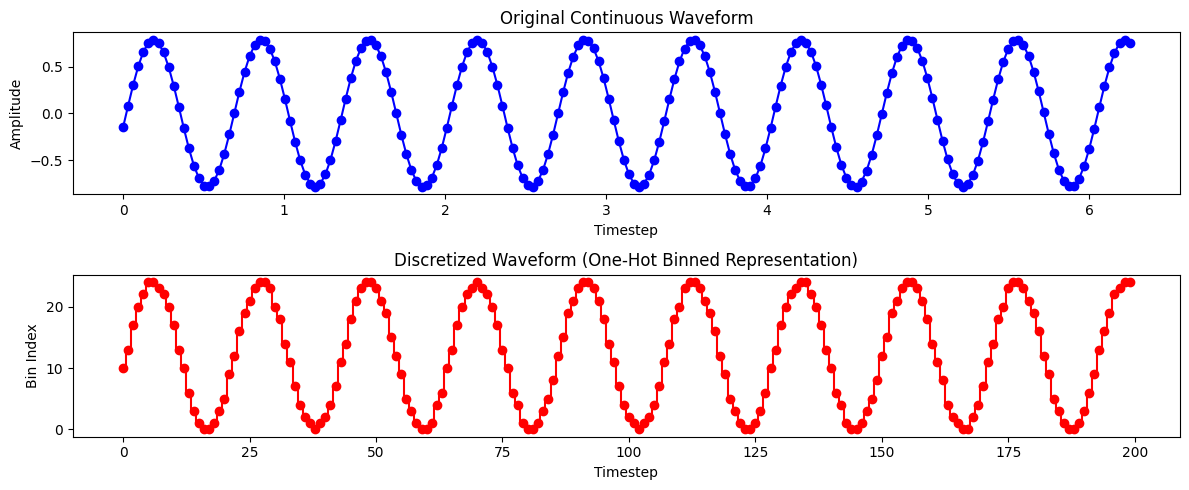

In [179]:
import matplotlib.pyplot as plt

# Generate a sample waveform dataset
num_sequences = 1       # We'll visualize one sequence for clarity
sequence_length = 200     # Length of each sequence
num_modes = 1
freq_range = (1.5, 10.5)
amp_range = (0.5, 1.5)
phase_range = (0, 2* np.pi)
num_bins = 25            # Number of bins for discretization

# Generate continuous waveforms
continuous_waveforms = generate_waveforms(num_sequences, sequence_length, num_modes, freq_range, amp_range, phase_range)

# Discretize the waveforms into one-hot bins
one_hot_waveforms = discretize_waveforms(continuous_waveforms, num_bins)

# Extract the continuous waveform and the discretized one-hot version
continuous_waveform = continuous_waveforms[0]  # Shape (sequence_length,)
discretized_waveform = np.argmax(one_hot_waveforms[0], axis=1)  # Get bin indices for plotting

# Plot the original continuous waveform
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, 2 * np.pi, sequence_length, endpoint=False), continuous_waveform, color='b', marker='o')
plt.title("Original Continuous Waveform")
plt.xlabel("Timestep")
plt.ylabel("Amplitude")

# Plot the discretized one-hot waveform
plt.subplot(2, 1, 2)
plt.step(range(sequence_length), discretized_waveform, where='mid', color='r', marker='o')
plt.title("Discretized Waveform (One-Hot Binned Representation)")
plt.xlabel("Timestep")
plt.ylabel("Bin Index")

plt.tight_layout()
plt.show()


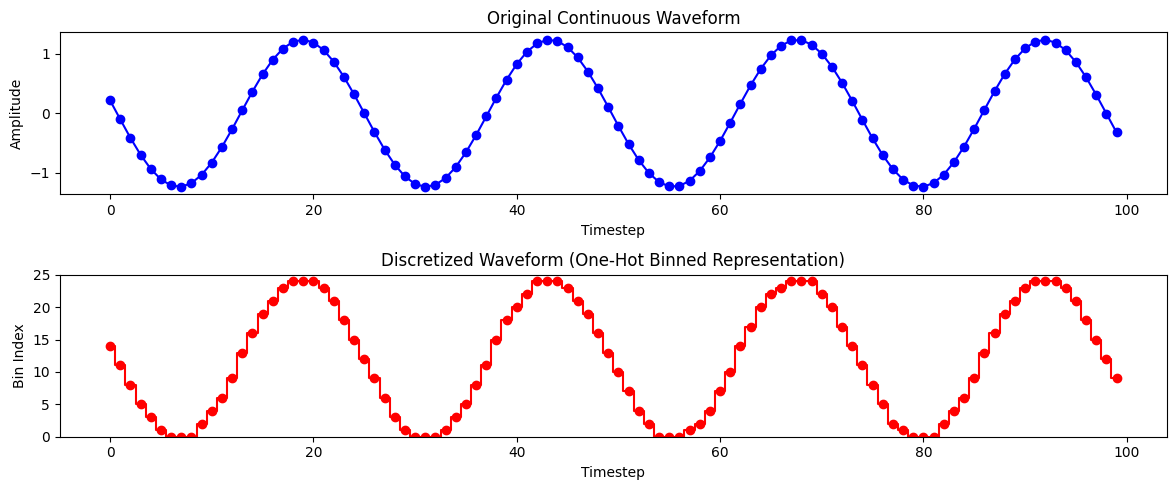

In [133]:
# Plot the original continuous waveform with sequence indices
plt.figure(figsize=(12, 5))

# Continuous waveform plot
plt.subplot(2, 1, 1)
plt.plot(range(sequence_length), continuous_waveform, color='b', marker='o')
plt.title("Original Continuous Waveform")
plt.xlabel("Timestep")
plt.ylabel("Amplitude")

# Discretized one-hot waveform plot with adjusted y-axis
plt.subplot(2, 1, 2)
plt.step(range(sequence_length), discretized_waveform, where='mid', color='r', marker='o')
plt.title("Discretized Waveform (One-Hot Binned Representation)")
plt.xlabel("Timestep")
plt.ylabel("Bin Index")
plt.ylim(0, num_bins)  # Set y-axis to span all possible bins

plt.tight_layout()
plt.show()
